<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/ML_Linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [12]:
#url= 'https://github.com/codebasics/py/commit/06c1351ea0ac9a4eb43c12f260b8a2148fd511be#diff-90a936378086de87f091bb0e806769694929157fca58844e98513c85fab64d60'
df= pd.read_excel('INDIA_GDP.xlsx')

In [13]:
df.rename(columns = {'GDP (current US$)':'GDP'}, inplace = True)
df

,Year,GDP
0,1992,2.882084e+11
1,1993,2.792960e+11
2,1994,3.272756e+11
3,1995,3.602820e+11
4,1996,3.928971e+11
5,1997,4.158678e+11
6,1998,4.213515e+11
7,1999,4.588204e+11
8,2000,4.683949e+11
9,2001,4.854410e+11


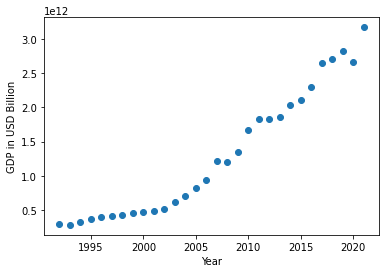

In [15]:
plt.xlabel("Year")
plt.ylabel("GDP in USD Billion")
plt.scatter(df.Year, df.GDP)


In [18]:
reg= linear_model.LinearRegression()
reg.fit(df[["Year"]], df.GDP)
reg.predict([[2030]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.68422602e+12])

In [19]:
reg.coef_

array([1.01604854e+11])

In [20]:
reg.intercept_

-202573628312151.84

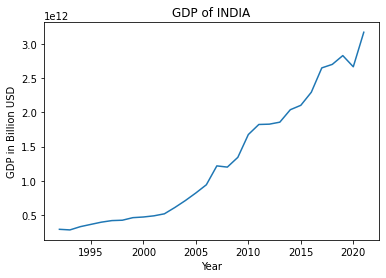

In [22]:
plt.xlabel("Year")
plt.ylabel("GDP in Billion USD")
plt.title("GDP of INDIA")
plt.plot(df.Year, df.GDP)

Multi Variable Regression Model

In [29]:
#url= 'https://github.com/codebasics/py/blob/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv'
#url="https://github.com/codebasics/py/blob/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv"
df1= pd.read_csv("/content/kc_house_data.csv")
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
df1.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [31]:
df1.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
#regg= linear_model.LinearRegression()
reg.fit(df1[[ 'bedrooms', 'bathrooms', 'sqft_living',
        'floors',  'yr_built', 'yr_renovated']],df1.price)

LinearRegression()

In [40]:
reg.coef_

array([-6.67293002e+04,  6.63925126e+04,  2.99159465e+02,  5.46157080e+04,
       -3.28598947e+03,  1.96393823e+01])

In [36]:
reg.intercept_

6192819.899430008

In [42]:
reg.predict([[6,3,7500,2, 2009, 2009]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1985459.88661028])